In [30]:
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
text_file = open("training_data.txt", "r")
train_N = text_file.read().split(' ') #N = Total no, of words from training set
K = list(set(train_N)) #K = 10,000 distinct words
c = collections.Counter(train_N)#c is a dictionary of 10,000 distinct words

In [3]:
new_test = open("test_data.txt", "r")
ttesting = new_test.read().split(' ') #all the words from test set

In [4]:
training_sets = []
training_sets.append(train_N[:5000]) #N/128
training_sets.append(train_N[:10000]) #N/64 
training_sets.append(train_N[:40000]) #N/16
training_sets.append(train_N[:160000]) #N/4
training_sets.append(train_N) #N

In [85]:
#training function
def training_process(alpha,trainingdataset,token):
    modelsML = []
    modelsMAP = []
    modelsPP = [] #a vector of 5 dictionaries
    K = 10000
    
    for each_set in trainingdataset:
        dictionary = collections.Counter(each_set)
        N = len(each_set) #5000 10000 ... 640000
        
        temp_model = collections.Counter()
        
        ML = collections.Counter()
        MAP = collections.Counter()
        PP = collections.Counter()
        for word in each_set:
            ML[word] = dictionary[word]/N
            MAP[word] = (dictionary[word]+alpha-1)/(N-K+(alpha*K))
            PP[word] = (dictionary[word]+alpha)/(N+(alpha*K))
            
        
        modelsML.append(ML)
        modelsMAP.append(MAP)
        modelsPP.append(PP)
            
    return modelsML,modelsMAP,modelsPP

In [99]:
def perplexity(model, run_test, token):
    
    N = len(run_test)
    K = 10000
    
    probability = np.zeros(len(run_test))
    for index,word in enumerate(run_test):
        probability[index] = model[word]

    for i in range(len(probability)):
        if probability[i] == 0:
            if token == 'ML':
                probability[i] = np.log(0.000000001)
            elif token == 'MAP':
                probability[i] = np.log(1/(N+K))
            elif token == 'PP':
                probability[i] = np.log(2/(N+(2*K)))

        else:
            probability[i] = np.log(probability[i])
        


    pp = np.exp((-1/N)*np.sum(probability))
    return pp

In [100]:
def plot_data(mlmodels,mapmodel,pmodel,training,testing):
    
    #2 plots training & testing
    training_ml = []
    training_map = []
    training_p = []
    testing_ml = []
    testing_map = []
    testing_p = []
    
    for index in range(len(mlmodels)):

        temp_ml = perplexity(mlmodels[index],training[index],'ML')
        training_ml.append(temp_ml)
        
        temp_test_ml = perplexity(mlmodels[index],testing,'ML')
        testing_ml.append(temp_test_ml)
        
        temp_map = perplexity(mapmodel[index],training[index],'MAP')
        training_map.append(temp_map)
            
        temp_test_map = perplexity(mapmodel[index],testing,'MAP')
        testing_map.append(temp_test_map)
        
        temp_p = perplexity(pmodel[index],training[index],'PP')
        training_p.append(temp_p)
        
        temp_test_p = perplexity(pmodel[index],testing,'PP')
        testing_p.append(temp_test_p)
    

    training_para = [5000,10000,40000,160000,640000]
    plt.plot(training_para,training_ml,'-o',label="training_ml")
    plt.plot(training_para,training_map,'-o',label="training_map")
    plt.plot(training_para,training_p,'-o',label="training_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.ylim(2000,10000)
    plt.legend(loc='upper right')
    plt.title("Training perplexity")
    plt.show()
    
    plt.plot(training_para,testing_ml,'-o',label="testing_ml")
    plt.plot(training_para,testing_map,'-o',label="testing_map")
    plt.plot(training_para,testing_p,'-o',label="testing_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title("Testing perplexity")
    plt.show()
    
    print(testing_ml)
    print(testing_map)
    print(testing_p)


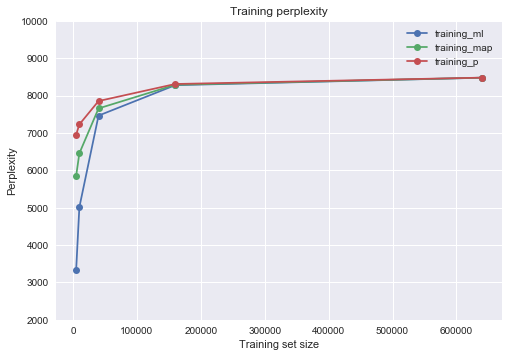

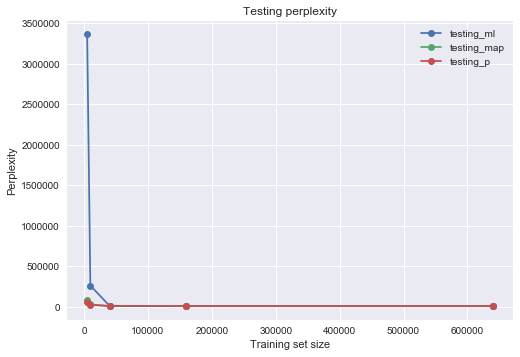

[3364468.6329755015, 262941.87364015356, 13278.746342540628, 8896.479676618837, 8612.445116409]
[78551.384840482, 29857.16761475715, 10187.89999407906, 8809.146656412731, 8609.629981597624]
[58240.914755969156, 25550.52739887495, 9970.380622742068, 8788.270012701903, 8608.067668723614]


In [101]:
mlml,mapmap,pppp = training_process(2,training_sets,'')
plot_data(mlml,mapmap,pppp,training_sets,ttesting)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


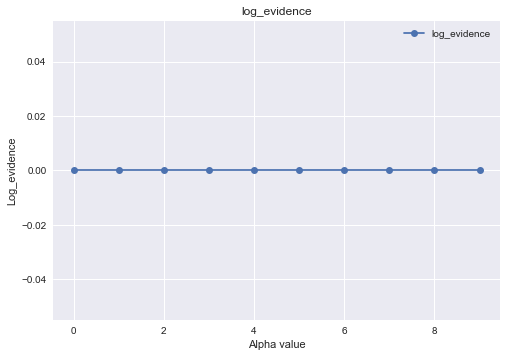

In [52]:
#Task 2
#run alpha = 1~10 for training set of size N/128 = 5000
task_2 = training_sets[0].copy()
dictionary_for_task_2 = collections.Counter(task_2)
list_of_dict = list(dictionary_for_task_2.items())
log_evidence = []
alpha_list = [1,2,3,4,5,6,7,8,9,10]
K = 10000
N = 5000


for a in alpha_list:
    
    #temp = (math.factorial(a*(K-1)))/(math.factorial(a*(K+N-1)))
    temp_1 = np.log(math.factorial(a*K))
    temp_2 = np.log(math.factorial((a*K)+N))
    temp = temp_1 + temp_2
    print(temp)
    for i in range(K):
        word_counts = list_of_dict[i][1]
        right = math.factorial(a + word_counts-1)/math.factorial(a-1)
        temp = temp * right
        
    log_evidence.append(temp)#np.log(temp))

plt.plot(log_evidence,'-o',label="log_evidence")
plt.xlabel('Alpha value')
plt.ylabel('Log_evidence')
#plt.ylim(0,120000)
plt.legend(loc='upper right')
plt.title("log_evidence")
plt.show()

In [50]:
import math
k = math.factorial(5000)/math.factorial(3000)
print(k)

OverflowError: integer division result too large for a float

In [48]:
lmao= list(dictionary_for_task_2.items())
print(lmao[0][1]*7)


7
